In this homework fit and select a classifier to predict credit card default using `default_of_credit_card_clients` dataset from the course folder on Google drive. The data description is available at : https://www.kaggle.com/datasets/jishnukoliyadan/taiwan-default-credit-card-clients

1. Explore (5+5+10=20 points)
  1. load the dataset. Use only the columns "LIMIT_BAL", "SEX", "EDUCATION", "MARRIAGE", and "AGE" among predictors. The target is "default payment next month".
  1. identify the categorical features (with brief 1-3 sentence explanation), and
  1. produce the pairwise scatter plot only for the numeric variables.
1. Prepare a pipeline to (30 points)
  1. standardize the numeric attributes
  1. expand the categorical attributes to columns of 0/1 variables
  1. fit a `RandomForestClassifier` classifier
1. Search over the `max_depth` and `min_samples_leaf` parameters to find the best model per **balanced accuracy** metric. Use at least three different search strategies and discuss any differences you see in the results (≈ 150—200 words). (20 points)
1. Let's assume that the cost of missing a default (i.e., predicting non-default for a customer who ended up defaulting) is 10 times the cost of flagging a non-defaulter as defaulter. Let's further assume that the cost of correct predictions are 0. Use any one of the search strategies considered in the previous question to find the `RandomForestClassifier` that minimizes the cost. (20 points)
1. Collaboration statement: Who did you discuss while answering this homework (whether to get or to provide help)? What questions/topics did you discuss? Did you use any generative AI tool, such as ChatGPT? If so, provide your prompts. (10 points)

Note: No penalty for either side. While getting help in figuring out how to solve is OK, all answers should be produced by you.

If you did not collaborate with anyone simply declare so.


# 1. Explore

## 1.1 Loading the dataset

In [3]:
import pandas as pd
import numpy as np

In [4]:
df1 = pd.read_csv('https://raw.githubusercontent.com/eshentong/BA810/main/default_of_credit_card_clients.csv')

In [5]:
df1.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
df= df1.copy()
df= df[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'default payment next month']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   default payment next month  30000 non-null  int64
dtypes: int64(6)
memory usage: 1.4 MB


In [7]:
print(df.describe())
df.head()

            LIMIT_BAL           SEX     EDUCATION      MARRIAGE           AGE  \
count    30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean    167484.322667      1.603733      1.853133      1.551867     35.485500   
std     129747.661567      0.489129      0.790349      0.521970      9.217904   
min      10000.000000      1.000000      0.000000      0.000000     21.000000   
25%      50000.000000      1.000000      1.000000      1.000000     28.000000   
50%     140000.000000      2.000000      2.000000      2.000000     34.000000   
75%     240000.000000      2.000000      2.000000      2.000000     41.000000   
max    1000000.000000      2.000000      6.000000      3.000000     79.000000   

       default payment next month  
count                30000.000000  
mean                     0.221200  
std                      0.415062  
min                      0.000000  
25%                      0.000000  
50%                      0.000000  
75%               

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,default payment next month
0,20000,2,2,1,24,1
1,120000,2,2,2,26,1
2,90000,2,2,2,34,0
3,50000,2,2,1,37,0
4,50000,1,2,1,57,0


## 1.2 - Identify the categorical features

I believe '`SEX, EDUCATION, MARRIAGE` and '`default payment next month`' are all categorical features. As they're not continous metrics, and are mapped through numeric representations.



*   `Gender` (1 = male; 2 = female)
*  `Education` (1 = graduate school; 2 = university; 3 = high school; 4 = others)
*   `Marital status` (1 = married; 2 = single; 3 = others)
*  ` default payment next month` ( 1= yes, 0= no)





After checking the null values of the dataset, I realized that there are some out of bound categorical values, such as: 0, 5, 6 in `EDUCATION` and `MARRIAGE` columns.

Since they're categorical features, I believe it's best to compute using ***Mode***, since a ***Mean*** of these features might not really mean anything.

In [8]:
df['EDUCATION'].value_counts().sort_index()

0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
Name: EDUCATION, dtype: int64

In [9]:
df['MARRIAGE'].value_counts().sort_index()

0       54
1    13659
2    15964
3      323
Name: MARRIAGE, dtype: int64

In [10]:
df.loc[df['EDUCATION'].isin([0, 5, 6]), 'EDUCATION'] = np.nan

In [11]:
df.loc[df['MARRIAGE']== 0, 'MARRIAGE'] = np.nan

##1.3- produce the pairwise scatter plot only for the numeric variables.

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
num_cols = ['LIMIT_BAL', 'AGE']
cat_cols = ['SEX', 'EDUCATION', 'MARRIAGE']

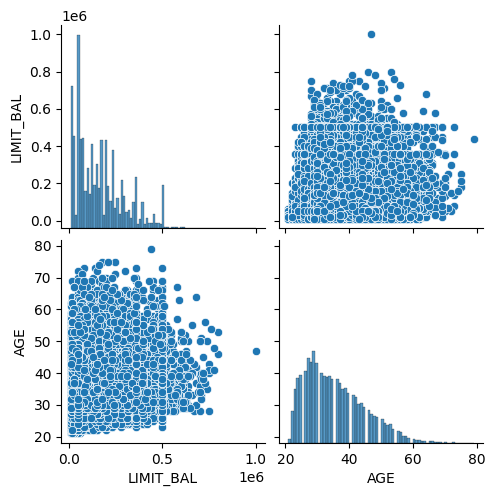

In [14]:
sns.pairplot(df[num_cols]);

#2. Prepare a pipeline

## 2.1 & 2.2 : standardize the numeric attributes & expand the categorical attributes to columns of 0/1 variables

In [34]:
from sklearn.model_selection import train_test_split

#Splitting the data
X= df.drop('default payment next month', axis= 1)
y = df['default payment next month']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((22500, 5), (7500, 5), (22500,), (7500,))

In [35]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

categorical_transformer = Pipeline([
    ("onehot", OneHotEncoder()),
    ("imputer", SimpleImputer(strategy='most_frequent'))
])

numerical_transformer = Pipeline([
    ("scaler", StandardScaler())
])

preprocess_pipeline = ColumnTransformer([
    ("cat", categorical_transformer, cat_cols),
    ("num", numerical_transformer, num_cols)
])

pipeline = Pipeline([
    ("preprocessing", preprocess_pipeline),
    ("clf", RandomForestClassifier(random_state=42))
])

## 2.3: fit a RandomForestClassifier classifier

In [82]:
clf= pipeline.fit(X_train, y_train)

In [83]:
y_pred= clf.predict(X_test)

In [84]:
from sklearn.metrics import balanced_accuracy_score
print(f'Balanced accuracy: {balanced_accuracy_score(y_test, y_pred):.3f}')

Balanced accuracy: 0.525


#3. Search Strategies

Search over the max_depth and min_samples_leaf parameters to find the best model per balanced accuracy metric. Use at least three different search strategies and discuss any differences you see in the results (≈ 150—200 words). (20 points)



## 3.1 - Grid Search

In [94]:
from sklearn.model_selection import GridSearchCV
import numpy as np

#transforming X_train
param_grid = {'clf__max_depth' : np.arange(1, 100, 10),
                       'clf__min_samples_leaf' :  np.arange(1, 5)}

grid_search = GridSearchCV(pipeline,
                                               param_grid,
                                               n_jobs=-1, # use all available CPU
                                               cv=5,
                                               scoring='balanced_accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder()),
                                                                                         ('imputer',
                                                                                          SimpleImputer(strategy='most_frequent'))]),
                                                                         ['SEX',
                                                                          'EDUCATION',
                                                                          'MARRIAGE']),
                                                                        ('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['LIMIT_BAL',
                                                                          'AGE'])])),
                                       ('clf',
                                        RandomForestClassifier(random_state=7))]),
             n_jobs=-1,
             param_grid={'clf__max_depth': array([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91]),
                         'clf__min_samples_leaf': array([1, 2, 3, 4])},
             scoring='balanced_accuracy')

In [89]:
grid_res = pd.DataFrame(grid_search.cv_results_)
grid_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
grid_res.filter(regex = '(^param_|mean_test_score)', axis=1).head(10)

,param_clf__max_depth,param_clf__min_samples_leaf,mean_test_score
8,21,1,0.523945
28,71,1,0.522569
20,51,1,0.522569
32,81,1,0.522569
16,41,1,0.522569
24,61,1,0.522569
12,31,1,0.522427
13,31,2,0.518043
9,21,2,0.517917
21,51,2,0.517758


In [90]:
#transforming X_test
y_pred_grid= grid_search.best_estimator_.predict(X_test)
print(f'Balanced accuracy: {balanced_accuracy_score(y_test, y_pred_grid):.3f}')

Balanced accuracy: 0.527


## 3.2 - Random Search

In [91]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {'clf__max_depth' : randint(low=2, high=100),
                             'clf__min_samples_leaf' : randint(low= 1, high = 15)}

rnd_search = RandomizedSearchCV( pipeline,
                                                             param_distribs,
                                                             n_jobs = -1,
                                                             n_iter=30,
                                                             cv=5,
                                                             scoring='balanced_accuracy',
                                                             random_state= 42)

rnd_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('cat',
                                                                               Pipeline(steps=[('onehot',
                                                                                                OneHotEncoder()),
                                                                                               ('imputer',
                                                                                                SimpleImputer(strategy='most_frequent'))]),
                                                                               ['SEX',
                                                                                'EDUCATION',
                                                                                'MARRIAGE']),
                                                                              ('num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               ['LIMIT_BAL',
                                                                                'AGE'])])),
                                             ('clf',
                                              RandomForestClassifier(random_state=7))]),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'clf__max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7cf88d8d3eb0>,
                                        'clf__min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7cf8900d16f0>},
                   random_state=42, scoring='balanced_accuracy')

In [92]:
rnd_res = pd.DataFrame(rnd_search.cv_results_)
rnd_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
rnd_res.filter(regex = '(^param_|mean_test_score)', axis=1).head(10)

,param_clf__max_depth,param_clf__min_samples_leaf,mean_test_score
12,22,1,0.523458
15,90,1,0.522569
26,40,2,0.517758
7,25,3,0.510321
21,56,4,0.509198
6,89,5,0.505932
8,23,5,0.505546
10,31,6,0.504036
3,22,7,0.503567
4,84,7,0.503167


In [93]:
y_pred_rnd= rnd_search.best_estimator_.predict(X_test)
print(f'Balanced accuracy: {balanced_accuracy_score(y_test, y_pred_rnd):.3f}')

Balanced accuracy: 0.529


## 3.3 Baye's Search

In [18]:
!pip install scikit-optimize  # well established, easy to use, hyper-parameter tuning package

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 3.0 MB/s eta 0:00:00


In [63]:
from skopt import BayesSearchCV
from skopt.space import Integer

param_distribs = {'clf__max_depth' : Integer(low=1, high=100),
                             'clf__min_samples_leaf' : Integer(low= 1, high = 5)}

bayes_search = BayesSearchCV(
                                                      pipeline,
                                                      param_distribs,
                                                      n_jobs = -1,
                                                      n_iter=30,
                                                      cv=3,
                                                      scoring='balanced_accuracy',
                                                      random_state=42)
bayes_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BayesSearchCV(cv=3,
              estimator=Pipeline(steps=[('preprocessing',
                                         ColumnTransformer(transformers=[('cat',
                                                                          Pipeline(steps=[('onehot',
                                                                                           OneHotEncoder()),
                                                                                          ('imputer',
                                                                                           SimpleImputer(strategy='most_frequent'))]),
                                                                          ['SEX',
                                                                           'EDUCATION',
                                                                           'MARRIAGE']),
                                                                         ('num',
                                                                          Pipeline(steps=[('scaler',
                                                                                           StandardScaler())]),
                                                                          ['LIMIT_BAL',
                                                                           'AGE'])])),
                                        ('clf',
                                         RandomForestClassifier(random_state=7))]),
              n_iter=30, n_jobs=-1, random_state=42,
              scoring='balanced_accuracy',
              search_spaces={'clf__max_depth': Integer(low=2, high=100, prior='uniform', transform='normalize'),
                             'clf__min_samples_leaf': Integer(low=1, high=5, prior='uniform', transform='normalize')})

In [64]:
bayes_res = pd.DataFrame(bayes_search.cv_results_)
bayes_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
bayes_res.filter(regex = '(^param_|mean_test_score)', axis=1).head(10)

,param_clf__max_depth,param_clf__min_samples_leaf,mean_test_score
28,27,1,0.524335
29,29,1,0.524135
26,31,1,0.523692
22,31,1,0.523692
19,24,1,0.523651
14,61,1,0.523493
27,84,1,0.523493
23,51,1,0.523493
18,75,1,0.523493
10,100,1,0.523493


In [65]:
y_pred_bayes= bayes_search.best_estimator_.predict(X_test)
print(f'Balanced accuracy: {balanced_accuracy_score(y_test, y_pred_bayes):.3f}')

Balanced accuracy: 0.526


Surprisingly, RandomSearch returned the highest balanced accuracy:

> *   No Cross Validation: 0.525
*   GridSearchCV: 0.527
*   RandomSearchCV: 0.529
*   BayesSeachCV: 0.526

The balanced accuracy ranking goes from RandomSearchCV, GridSearchCV and BayesSearchCV. Although this result is likely due to the randomSearch happened to fit the test set better.

When looking at the balanced accuracy for the training set, we can see that Grid Search and Bayes Search have relatively higher metrics, when compared to random search. This is because Grid Search goes through all combinations of hyperparameters and finds the global minimum, while Random Search finds the local minimum through its sporadic search. Bayes Search still has the 'randomness' in its search, but its learning capability allows it to gravitate towards the better performing hyperparameter.

Their search strategies are also shown in their top results. For example, GridSearch sees a general trend of higher `max_depth` and small `samples_leaf` parameters. With seven of top 10 `max_depths` results above 50, and all of `samples_leaf` at 1 or 2. Apparently, there's a pattern in its returned hyperparameters. Similarly, Baye's Search returned seven results of `max_depth` that are above 50, and all of its `samples_leaf` selections at 1. On the otherhand, Random Search sees a lack of pattern in its hyperparameter selection results.




#4. Minimize the Cost

Let's assume that the cost of missing a default (i.e., predicting non-default for a customer who ended up defaulting) is 10 times the cost of flagging a non-defaulter as defaulter. Let's further assume that the cost of correct predictions are 0. Use any one of the search strategies considered in the previous question to find the RandomForestClassifier that minimizes the cost. (20 points)

Assuming:

> 1.   FP: flagging a non-defaulter as defaulter costs $1

> 2.   FN: predicting non-default for a customer who ended up defaulting costs $10

The cost matrix would look like: **[[0   1][10   0]]**

Hence, by multiplying the confusion matrices, we can find the model with minimized cost.



In [136]:
from sklearn.metrics import confusion_matrix, make_scorer
def cost_function(y_true, y_pred):
  [[tn, fp], [fn, tp]]= confusion_matrix(y_true, y_pred)
  cost= (fp+ fn*10)
  # cost= (fn*10)
  return cost

cost_function_scorer = make_scorer(cost_function, greater_is_better=False)

In [164]:
from sklearn.model_selection import RandomizedSearchCV
from skopt import BayesSearchCV
from skopt.space import Integer
from scipy.stats import randint

param_distribs = {'clf__max_depth' : randint(low=2, high=100),
                             'clf__min_samples_leaf' : randint(low= 1, high = 15)}

rnd_search1 = RandomizedSearchCV(pipeline, param_grid, n_jobs=-1, cv=7, n_iter=30, scoring=cost_function_scorer, random_state= 42)
rnd_search1.fit(X_train, y_train)

RandomizedSearchCV(cv=7,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('cat',
                                                                               Pipeline(steps=[('onehot',
                                                                                                OneHotEncoder()),
                                                                                               ('imputer',
                                                                                                SimpleImputer(strategy='most_frequent'))]),
                                                                               ['SEX',
                                                                                'EDUCATION',
                                                                                'MARRIAGE']),
                                                                              ('num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               ['LIMIT_BAL',
                                                                                'AGE'])])),
                                             ('clf',
                                              RandomForestClassifier(random_state=7))]),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'clf__max_depth': array([50, 55, 60, 65, 70, 75, 80, 85, 90, 95]),
                                        'clf__min_samples_leaf': array([1, 2, 3, 4, 5])},
                   scoring=make_scorer(cost_function, greater_is_better=False))

In [165]:
y_pred_cost= rnd_search1.best_estimator_.predict(X_test)
print(f'Lowest Cost: {cost_function(y_test, y_pred_cost):.3f}')

Lowest Cost: 14371.000


In [166]:
print(rnd_search1.best_params_)

{'clf__min_samples_leaf': 1, 'clf__max_depth': 85}


In [167]:
print(confusion_matrix(y_test, rnd_search1.best_estimator_.predict(X_test)))

[[5227  641]
 [1373  259]]


This shows that the cost can be minimized to **8,836.6** units when `max_depth` is 35 and `min_samples_leaf` is 1.
> 1. FP: 641
> 2. FN: 1373

#5. Collaboration statement

Who did you discuss while answering this homework (whether to get or to provide help)? What questions/topics did you discuss? Did you use any generative AI tool, such as ChatGPT? If so, provide your prompts. (10 points)



1.   ChatGPT:
 * Pipeline: I've used ChatGPT to refine my pipeline, which is used for all three search models
 * Flow check: I've used ChatGPT to check my code's flow, it helped me to move test data's transformation past train data fitting. This reduces the risk of data leakage

2. In-class Lab Notebooks:

 * [Lab7](https://colab.research.google.com/drive/1clrxgoToYzv3iWh57EA-u4NMQhcydYNs?usp=sharing)

 * [Lab5](https://colab.research.google.com/drive/1WdYSqN5vP4o0764sMWxWgrkAMEblKOdj?usp=sharing)